# Importando todas as estruturas

In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from src.bst import BinarySearchTree
from src.avl import AVLTree
from src.b_plus import BPlusTree
from src.tries import Trie, PatriciaTrie
from src.hash_table import HashTable
from src.visualizer import TreeVisualizer

viz = TreeVisualizer()

## Testes com a visualização da Binary Search Tree (BST):

### Exemplo 1: Não-autobalanceamento da árvore a partir do pior caso (o proximo valor da inserção é sempre maior que o anterior)

In [2]:
viz = TreeVisualizer()

#### 1. Inserindo elementos de uma lista crescente

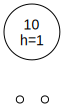

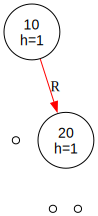

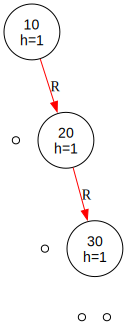

In [3]:
bst = BinarySearchTree()
data_bst = [10, 20, 30]
for num in data_bst:
    bst.insert(num)
    display(viz.visualize_binary_tree(bst))

#### 2. Inserindo elementos de uma lista decrescente

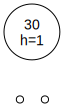

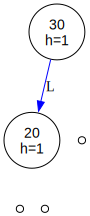

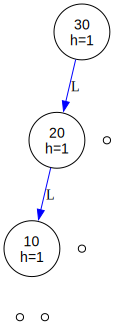

In [4]:
bst = BinarySearchTree()
for num in data_bst[::-1]:
    bst.insert(num)
    display(viz.visualize_binary_tree(bst))


#### Observa-se então que se os elementos forem inseridos em ordem (crescente ou decrescente) a árvore BST terá formato de uma lista encadeada.

### Exemplo 2: Remoção e visualização da substituição por sucessor

#### 1. Adicionando uma lista = [50, 30, 70, 60, 80] á árvore

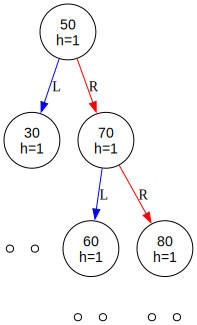

In [5]:
bst = BinarySearchTree()
data_bst = [50, 30, 70, 60, 80]

for num in data_bst:
    bst.insert(num)
viz.visualize_binary_tree(bst)


#### 2. Removendo 50 (root), o número a ocupar o espaço dela é o 60, seu sucessor

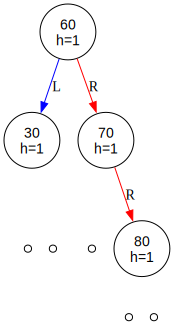

In [6]:
bst.remove(50)
viz.visualize_binary_tree(bst)

### Exemplo 3: Lista em zigue-zague: a árvore não é cheia e nem é lista ordenada, mas disposta em zigue-zague

#### 1. A lista a ser inserida é a seguinte: [50, 30, 40, 35]

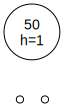

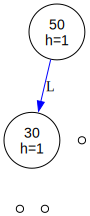

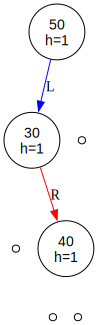

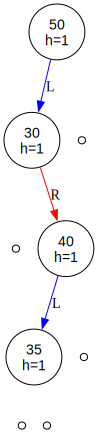

In [7]:
bst = BinarySearchTree()
data_bst = [50, 30, 40, 35]
for num in data_bst:
    bst.insert(num)
    display(viz.visualize_binary_tree(bst))

#### Vê-se então que quando os numeros a serem inseridos seguem uma 'ordem' de um numero sempre ser seguido por um sucessor e esse sucessor ser seguido por um antecessor dele mesmo, a árvore fica desbalanceada (não-cheia) e em formato de zigue-zague.

## Demonstrações na AVL Tree:

### Exemplo 1: Forçando Rotação Simples

#### Será inserido uma lista = [30, 20, 10]

#### 1. Insere-se primeiro o 30 e 20

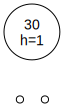

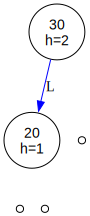

In [8]:
data_avl = [30, 20, 10]
avl = AVLTree()
avl.insert(data_avl[0])
display(viz.visualize_binary_tree(avl))
avl.insert(data_avl[1])
display(viz.visualize_binary_tree(avl))

#### Agora se insere o 10. Com a inserção, a árvore ficaria desbalanceada (fator de balanceamento = -2). Assim, automaticamente, o 20 deve ser ajustado para a raiz, por conta do autobalanceamento (rotação para a direita do 20)

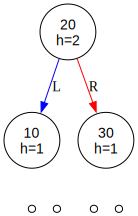

In [9]:
avl.insert(data_avl[2])
viz.visualize_binary_tree(avl)

### Exemplo 2: Forçando Rotação Dupla

#### Será inserido uma lista = [30, 10, 20]

#### 1. Inserem-se o 30 e o 10.

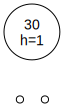

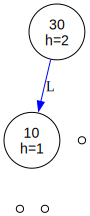

In [10]:
data_avl = [30, 10, 20]
avl = AVLTree()
avl.insert(data_avl[0])
display(viz.visualize_binary_tree(avl))
avl.insert(data_avl[1])
display(viz.visualize_binary_tree(avl))

#### 2. Nessa situação, quando o 20 for inserido, a árvore ficará formatada em zigue-zague (fator de balanceamento = 2 em 30 e = -1 no nó 10) - o que força uma rotação dupla à direita. Tornando 20 a nova raiz.

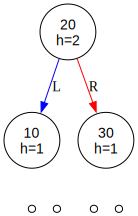

In [11]:
avl.insert(data_avl[2])
display(viz.visualize_binary_tree(avl))

#### Exemplo 3: Rebalanceamento pós-Remoção

#### Adicionando uma lista = [20, 10, 30, 40]. A árvore inicialmente está devidamente balanceada.

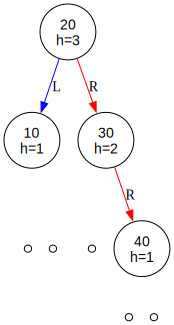

In [12]:
avl = AVLTree()
data_avl = [20, 10, 30, 40]
for num in data_avl:
    avl.insert(num)
viz.visualize_binary_tree(avl)

#### Caso eu remova 10, a árvore ficará desbalanceada. O fator de balanceamento no nó raiz será -3, o que força uma rotação à direita.

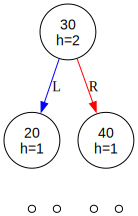

In [13]:
avl.remove(10)
viz.visualize_binary_tree(avl)

## Utilizando a estrutura da árvore B+

### Exemplo 1: Forçando split da página raiz

#### 1. Cria-se uma árvore de ordem 3 (M = 3), que implica que o número máximo de chaves é 2 de chaves = [10, 20, 30]

In [14]:
bplus = BPlusTree(3)
bplus_data = [10, 20, 30]
bplus.insert(bplus_data[0])
bplus.insert(bplus_data[1])
viz.visualize_bplus_tree(bplus)


#### 2. Quando eu adiciono o 30, o número de chaves estoura, o que torna preciso um split da página. A mediana dos dados (20) sobe e cria 2 filhos.

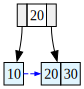

In [15]:
bplus.insert(bplus_data[2])
viz.visualize_bplus_tree(bplus)

### Exemplo 2: Cascade Split (o split da folha força o pai dela a se dividir tambem)

#### 1. Insere-se uma lista [10, 20, 30, 40, 50]. Na verdade, primeiramente adicionamos apenas os 4 primeiros.

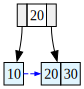

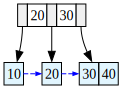

In [16]:
bplus = BPlusTree(3)
bplus_data = [10, 20, 30, 40]
for num in bplus_data:
    bplus.insert(num)
    display(viz.visualize_bplus_tree(bplus))

#### 2. Ao adicionar o 50, ele estoura a folha da direita, o que força um split dele. Entretanto, ao splitar esse ponteiro e subir a mediana (40), o ponteiro pai estoura também, o que, da mesma forma, força um split e a sua mediana (30) subir e formar a nova raiz da árvore.

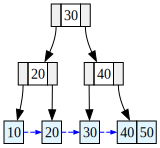

In [17]:
bplus.insert(50)
viz.visualize_bplus_tree(bplus)

### Exemplo 3: Demonstração do Merge (usando a mesma árvore do problema anterior, removemos o 40 e o 50)

#### 1. Removendo o 40, a folha da direita ficará apenas com o dado 50.

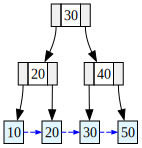

In [18]:
bplus.remove(40)
viz.visualize_bplus_tree(bplus)

#### Removendo o 50, eu fico com um número de chaves nulo na última folha da direita, o que a faz desaparecer. Porém, fazendo isso, o seu parent (40) ficou com menos ponteiros que o permitido (< 2). Ele tenta se fundir com o seu irmão 20, mas ele também nao pode ceder. Então, o 30 (raiz) desce, o que torna agora o 40 desprezível (servia apenas como separador) e faz com que exista um merge entre os novos nós internos 20 e 30 com 3 ponteiros. Além disso, importante salientar que a árvore desceu um nível a partir da descida do 30.

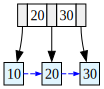

In [19]:
bplus.remove(50)
(viz.visualize_bplus_tree(bplus))

## Para a árvore Trie

### Exemplo 1: Caminho Fantasma - Desmarcar a flag de fim de palavra apenas removendo uma palavra que é prefixo da outra

#### 1. Adicionamos mar e marujo para a árvore. Vê-se que existe flag tanto no primeiro 'r' quanto na folha da árvore.

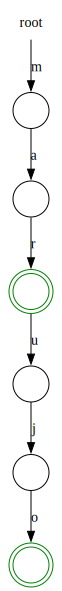

In [20]:
trie = Trie()
trie.insert("mar")
trie.insert("marujo")
viz.visualize_trie(trie)

#### 2. Retirando "mar" percebe-se que não há de fato remoção de nós, mas sim, remoção de uma flag (duplo círculo) da subárvore

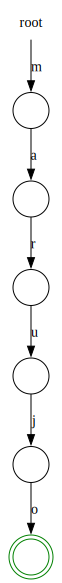

In [21]:
trie.remove("mar")
viz.visualize_trie(trie)

### Exemplo 2: Prefixos Comuns

#### Adicionar-se-á 3 palavras: "pato", "pateta", "patamar"

#### 1. Inserindo pato e pateta, conclui-se que foi aberta uma ramificação a partir da letra 't', que até ela temos a chave "pat", cuja é radical comum entre as duas palavras

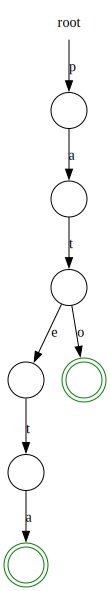

In [22]:
trie = Trie()
trie.insert("pato")
trie.insert("pateta")
viz.visualize_trie(trie)

#### 2. Colocando-se agora "patamar", a árvore aproveitará o nó "t" e apenas adicionar mais um filho a ele.

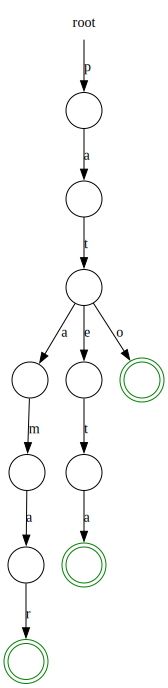

In [23]:
trie.insert("patamar")
viz.visualize_trie(trie)

## Problemas relacionados à trie Patrícia

### Exemplo 1: Inserção que divide aresta

#### Diferentemente da Trie convencional, a patrícia gasta menos espaço compactando caminhos que não se ramificam em uma única aresta.

#### Vemos isso na lista de inserção ["bala", "bola", "barco", "borda"]

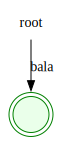

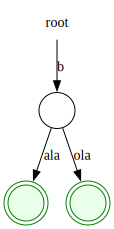

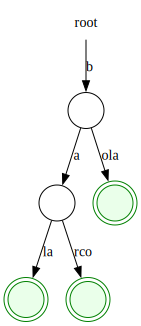

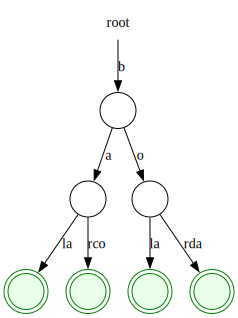

In [24]:
patricia = PatriciaTrie()
lista = ["bala","bola","barco","borda"]
for word in lista:
    patricia.insert(word)
    display(viz.visualize_patricia(patricia))


### Exemplo 2: Remoção de nós desnecessários

#### Removendo bola, veremos que 'o' só teria um filho. A própria estrutura da árvore reconhece que este filho não é necessário e o deleta, fazendo com que 'rda' suba para 'o'.

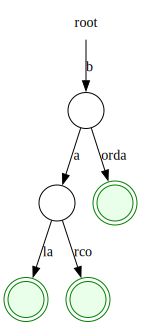

In [25]:
patricia.remove("bola")
viz.visualize_patricia(patricia)

## Visualização dos métodos da Hash Table

### Exemplo 1: Tabela sem colisão

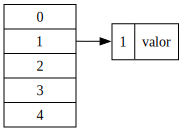

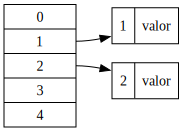

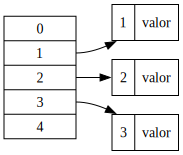

In [26]:
ht = HashTable(capacity=5)
lista_index = [1, 2, 3]
for k in lista_index: 
    ht.insert(k, "valor")
    display(viz.visualize_hashtable(ht))

### Exemplo 2: Colisão Forçada (Encadeamento)

#### Adiciona-se em uma tabela de tamanho pequeno valores sem que eles tenham necessariamente o mesmo índice. Força-se um encadeamento de lista dentro dos indices

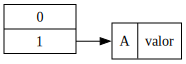

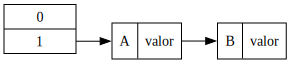

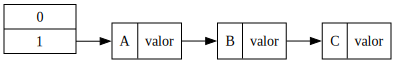

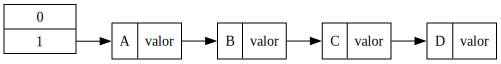

In [27]:
ht = HashTable(capacity=2)
data_ht = ["A", "B", 'C', 'D']
for k in data_ht:
    ht.insert(k, "valor")
    display(viz.visualize_hashtable(ht))

#### A função de hash calculada para as chaves "A", "B" e "C" resultou no mesmo índice (neste caso, o índice 1).

### Exemplo 3: Atualização de Valor

#### 1. Se insere no índice user um valor inicial = 10

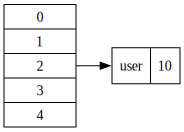

In [28]:
ht = HashTable(capacity=5)
ht.insert("user", 10)
viz.visualize_hashtable(ht)


#### Se for inserido um valor diferente mas de mesmo índice, este valor antigo deve ser trocado pelo novo (sem encadear)

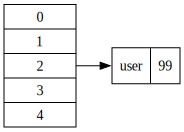

In [29]:
ht.insert("user", 99)
viz.visualize_hashtable(ht3)